Hopfield Networks

Base Functions

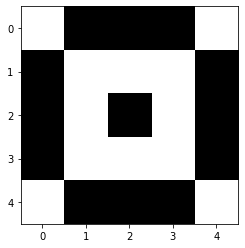

In [32]:
from numpy import array
####################################################################################
# Function: to_pattern
# Description: It allows to encode a pattern in a polar form
####################################################################################
def to_pattern(letter):
    from numpy import array
    return array([+1 if c=='X' else -1 for c in letter.replace('\n','')])
####################################################################################
# Function: display
# Description: It allows to display a pattern as image
####################################################################################
def display(pattern):
    from pylab import imshow, cm, show
    imshow(pattern.reshape((5,5)),cmap=cm.binary, interpolation='nearest')
    show()

#Use example
zero = """
.XXX.
X...X
X.X.X
X...X
.XXX.
"""
display(to_pattern(zero))

Create Training Patterns

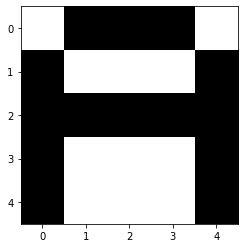

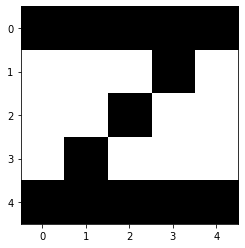

[[-1  1  1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1
   1]
 [ 1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1
   1]]


In [34]:
#Create the patterns to be "learned" by the hopfield network
A = """
.XXX.
X...X
XXXXX
X...X
X...X
"""
Z = """
XXXXX
...X.
..X..
.X...
XXXXX"""

patterns = array([to_pattern(A),to_pattern(Z)])
display(patterns[0])
display(patterns[1])
print(patterns)

Training

In [38]:
####################################################################################
# Function: fit
# Description: It allows to train a hopfield network given a pattern set. 
# Training a Hopfield network is extremely simple and requires only computation of the outer products
# of all pattern vectors with each others and summation of the resulting matrices.
####################################################################################
def fit(patterns):
    from numpy import zeros, outer, diag_indices
    r,c = patterns.shape
    W = zeros((c,c))
    for p in patterns:
        W = W + outer(p,p) #recall that the outner product give us a matrix u*t(v). Different to inner product
    W[diag_indices(c)] = 0
    return W/r

W=fit(patterns)
print(W)

[[ 0.  0.  0.  0.  1. -1.  0.  0.  1. -1. -1. -1.  0. -1. -1. -1.  1.  0.
   0. -1.  0.  1.  1.  1.  0.]
 [ 0.  0.  1.  1.  0.  0. -1. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0. -1.
  -1.  0.  1.  0.  0.  0.  1.]
 [ 0.  1.  0.  1.  0.  0. -1. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0. -1.
  -1.  0.  1.  0.  0.  0.  1.]
 [ 0.  1.  1.  0.  0.  0. -1. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0. -1.
  -1.  0.  1.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0. -1.  0.  0.  1. -1. -1. -1.  0. -1. -1. -1.  1.  0.
   0. -1.  0.  1.  1.  1.  0.]
 [-1.  0.  0.  0. -1.  0.  0.  0. -1.  1.  1.  1.  0.  1.  1.  1. -1.  0.
   0.  1.  0. -1. -1. -1.  0.]
 [ 0. -1. -1. -1.  0.  0.  0.  1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.
   1.  0. -1.  0.  0.  0. -1.]
 [ 0. -1. -1. -1.  0.  0.  1.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.
   1.  0. -1.  0.  0.  0. -1.]
 [ 1.  0.  0.  0.  1. -1.  0.  0.  0. -1. -1. -1.  0. -1. -1. -1.  1.  0.
   0. -1.  0.  1.  1.  1.  0.]
 [-1.  0.  0.  0. -1.  1.  0.  0. -1.  0.  1.  1.  0.  

Prediction

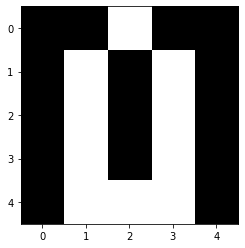

[[-1  1  1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1
   1]
 [ 1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1
   1]]


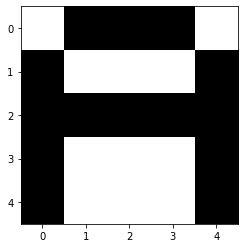

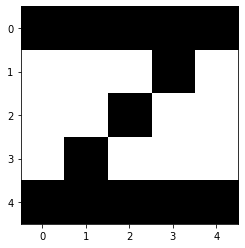

In [41]:
####################################################################################
# Function: predict
# Description: It allows to train a hopfield network given a pattern set. 
# Training a Hopfield network is extremely simple and requires only computation of the outer products
# of all pattern vectors with each others and summation of the resulting matrices.
####################################################################################
def predict(W, patterns, steps):
    from numpy import vectorize, dot
    sgn = vectorize(lambda x: -1 if x<0 else +1)#Lambda expression
    for _ in range(steps):
        patterns = sgn(dot(patterns,W))
        print(patterns)
    return patterns
A_ = """
XX.XX
X.X.X
X.X.X
X.X.X
X...X
"""
Z_ = """
XXXXX
X.XX.
XXX.X
.XX..
XXXXX"""

newPatterns=array([to_pattern(A_),to_pattern(Z_)])
display(newPatterns[0])
predicted_patterns=predict(W,newPatterns,1)
display(predicted_patterns[0])
display(predicted_patterns[1])